In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.preprocessing import image_dataset_from_directory

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
BASE_PATH = '/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/TB_Chest_Radiography_Database/'

TRAIN_DIR = BASE_PATH + 'train/'
TEST_DIR = BASE_PATH + 'test/'
COLOR_MODE = 'rgb'
IMG_WIDTH = 224
IMG_HEIGHT = 224
IMG_CHANNELS = 3
BATCH_SIZE = 128
BUFFER_SIZE = BATCH_SIZE*5

train_set = image_dataset_from_directory(TRAIN_DIR,
                                            labels='inferred', 
                                            label_mode='int',
                                            color_mode=COLOR_MODE,
                                            batch_size=BATCH_SIZE,
                                            image_size=(IMG_WIDTH, IMG_HEIGHT),
                                            shuffle=True,
                                            seed=123,
                                            validation_split=0.2,
                                            subset='training')

dev_set = image_dataset_from_directory(TRAIN_DIR,
                                            labels='inferred', 
                                            label_mode='int',
                                            color_mode=COLOR_MODE,
                                            batch_size=BATCH_SIZE,
                                            image_size=(IMG_WIDTH, IMG_HEIGHT),
                                            shuffle=True,
                                            seed=123,
                                            validation_split=0.2,
                                            subset='validation')

train_dataset = train_set.cache().prefetch(buffer_size=BUFFER_SIZE)
validation_dataset = dev_set.cache().prefetch(buffer_size=BUFFER_SIZE)

Found 5600 files belonging to 2 classes.
Using 4480 files for training.
Found 5600 files belonging to 2 classes.
Using 1120 files for validation.


In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Model

In [4]:
from keras.applications.efficientnet import EfficientNetB7
from keras.models import Model
from keras.layers import Flatten, Dense

efficientnet = EfficientNetB7(include_top=False, input_shape=(224, 224, 3))

# breeze all VGG previous layers
for layer in efficientnet.layers:
	layer.trainable = False

flatten = Flatten()(efficientnet.layers[-1].output)
fc1 = Dense(128, activation='relu')(flatten)
out = Dense(1, activation='sigmoid')(fc1)

model = Model(inputs=efficientnet.inputs, outputs=out)
model.summary()

258088960/258076736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding

In [5]:
!pip install livelossplot

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

monitor_val_acc = EarlyStopping(monitor = 'val_loss', 
                                patience = 5)

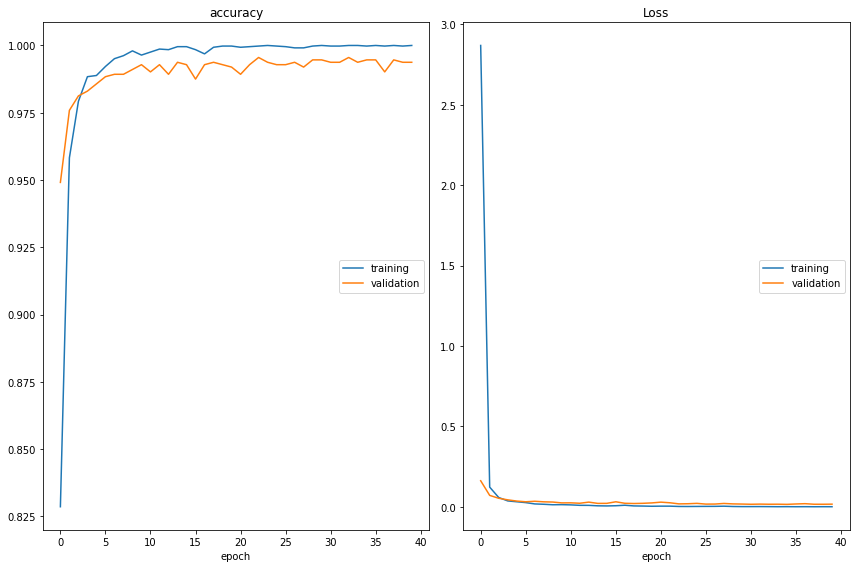

accuracy
	training         	 (min:    0.829, max:    1.000, cur:    1.000)
	validation       	 (min:    0.949, max:    0.996, cur:    0.994)
Loss
	training         	 (min:    0.001, max:    2.869, cur:    0.001)
	validation       	 (min:    0.016, max:    0.163, cur:    0.017)
35/35 [==============================] - 45s 1s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0171 - val_accuracy: 0.9937


In [7]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(train_set, 
           epochs = 200,
           batch_size=1024,
           callbacks=[PlotLossesKeras(), monitor_val_acc],
           validation_data = dev_set)
model.save('/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Models/Models for TB Chest Radiograph/model_efficientnet.h5')